<a href="https://colab.research.google.com/github/Tikulirekuti-Mwale/Publication_Types/blob/main/classification_of_Publication_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS UNDERSTANDING

CLASSIFICATIONS OF PUBLICATION TYPES

PROBLEM STATEMENT
In academic and research databases, publications come in a variety of formats such as journal articles, conference papers, book chapters, reports, and theses. Without proper classification, users may struggle to filter and find relevant resources quickly. Manual classificaition is time-consuming, error-prone, and inconsistent. There is a need for an automated, accurate, and scalable system that can classify publication types based on their content, metadata, or structure.
BUSINESS OBJECTIVES
The goal is to develop an automated classification model that can accurately categorize publications into their respective types. Success means that:
- Researchers and librarians can retrieve relevant materials faster.
- The system reduces manual workload in academic repositories.
- Users gain a more organized and searchable database of publications.
From a real-world perspective, this will save time, improve resource accessibility, and enhance knowledge discovery in academic and research environments.

DATA MINING GOALS
We will build a classification model to automatically categorize publication records into predefined types (e.g., Journal Article, Conference Paper, Book Chapter, Technical Report, Thesis). The model will leverage features extracted from publication metadata (title, abstract, keywords, publisher) and possibly the content itself to predict the publication type.

INITIAL PROJECT SUCCESS CRITERIA
-	The classification model should achieve at least 85% accuracy on the test dataset.
- The model should maintain consistent performance across different publication types, with no class having an F1-score lower than 75%.
- Predictions should be interpretable, allowing users to understand which features influenced the classification decision.


**bold text**
#Data Understanding


In this section, we perform an initial exploration of our dataset.  
The goal is to get a "feel" for the data, identify its characteristics,  
and detect potential quality issues.



In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving unza_publications.csv to unza_publications (1).csv


In [ ]:
df = pd.read_csv("unza_publications.csv")
df.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,27,"Y Yu, Z Yu, J Zhao",Computer Science for Environmental Engineering...,2011.0,NaN,Springer Science &Business Media,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,15,2025-08-19 15:00:57,...,NaN,NaN,27,1.93,9,3,14.0,NaN,NaN,NaN
1,22,C Muyunda,A Wireless Sensor Network Based Grain Inventor...,2016.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,22,2025-08-19 15:00:57,...,NaN,NaN,22,2.44,22,1,9.0,NaN,NaN,NaN
2,15,Y Zhang,Future wireless networks and information systems,2012.0,NaN,Springer,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,36,2025-08-19 15:00:57,...,NaN,NaN,15,1.15,15,1,13.0,NaN,NaN,NaN
3,1,"F Kabwe, Z Lusaka, J Phiri",A Review of Identity Attribute Metrics Modelin...,2018.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,167,2025-08-19 15:00:57,...,NaN,NaN,1,0.14,0,3,7.0,NaN,NaN,NaN
4,1,"J Katambo, M Nyirenda, J Phiri, Z Lusaka",A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,2009.0,NaN,"Burlington, USA: Morgan Kaufmann Publishers",NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,174,2025-08-19 15:00:57,...,NaN,NaN,1,0.06,0,4,16.0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cites           247 non-null    int64  
 1   Authors         247 non-null    object 
 2   Title           247 non-null    object 
 3   Year            230 non-null    float64
 4   Source          222 non-null    object 
 5   Publisher       4 non-null      object 
 6   ArticleURL      0 non-null      float64
 7   CitesURL        247 non-null    object 
 8   GSRank          247 non-null    int64  
 9   QueryDate       247 non-null    object 
 10  Type            196 non-null    object 
 11  DOI             0 non-null      float64
 12  ISSN            0 non-null      float64
 13  CitationURL     247 non-null    object 
 14  Volume          136 non-null    float64
 15  Issue           127 non-null    float64
 16  StartPage       139 non-null    float64
 17  EndPage         139 non-null    flo

In [ ]:
df.describe()

,Cites,Year,ArticleURL,GSRank,DOI,ISSN,Volume,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
count,247.000000,230.000000,0.0,247.00000,0.0,0.0,136.000000,127.000000,1.390000e+02,1.390000e+02,247.000000,247.000000,247.000000,247.000000,230.000000,0.0,0.0,0.0
mean,7.866397,2019.460870,NaN,124.00000,NaN,NaN,860.698529,3.094488,4.055877e+04,4.056957e+04,7.866397,1.662510,3.931174,2.603239,5.556522,NaN,NaN,NaN
std,21.533165,4.887891,NaN,71.44695,NaN,NaN,8702.764498,2.697539,4.702994e+05,4.702984e+05,21.533165,5.006035,10.862749,1.289604,4.869818,NaN,NaN,NaN
min,0.000000,1983.000000,NaN,1.00000,NaN,NaN,1.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,2018.000000,NaN,62.50000,NaN,NaN,5.000000,1.000000,5.950000e+01,6.500000e+01,0.000000,0.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN
50%,3.000000,2020.000000,NaN,124.00000,NaN,NaN,9.000000,2.000000,3.230000e+02,3.290000e+02,3.000000,0.570000,1.000000,2.000000,5.000000,NaN,NaN,NaN
75%,7.000000,2023.000000,NaN,185.50000,NaN,NaN,11.000000,4.000000,9.455000e+02,9.570000e+02,7.000000,1.805000,4.000000,3.000000,7.000000,NaN,NaN,NaN
max,289.000000,2025.000000,NaN,247.00000,NaN,NaN,101123.000000,12.000000,5.545406e+06,5.545406e+06,289.000000,72.250000,145.000000,8.000000,42.000000,NaN,NaN,NaN


In [ ]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
display(rows_with_missing_values)

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,27,"Y Yu, Z Yu, J Zhao",Computer Science for Environmental Engineering...,2011.0,NaN,Springer Science &Business Media,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,15,2025-08-19 15:00:57,...,NaN,NaN,27,1.93,9,3,14.0,NaN,NaN,NaN
1,22,C Muyunda,A Wireless Sensor Network Based Grain Inventor...,2016.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,22,2025-08-19 15:00:57,...,NaN,NaN,22,2.44,22,1,9.0,NaN,NaN,NaN
2,15,Y Zhang,Future wireless networks and information systems,2012.0,NaN,Springer,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,36,2025-08-19 15:00:57,...,NaN,NaN,15,1.15,15,1,13.0,NaN,NaN,NaN
3,1,"F Kabwe, Z Lusaka, J Phiri",A Review of Identity Attribute Metrics Modelin...,2018.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,167,2025-08-19 15:00:57,...,NaN,NaN,1,0.14,0,3,7.0,NaN,NaN,NaN
4,1,"J Katambo, M Nyirenda, J Phiri, Z Lusaka",A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,2009.0,NaN,"Burlington, USA: Morgan Kaufmann Publishers",NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,174,2025-08-19 15:00:57,...,NaN,NaN,1,0.06,0,4,16.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0,"G Sichilima, J Phiri",Integrating Chicken Fecal Image Analysis with ...,2024.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,193,2025-08-19 15:00:57,...,24.0,28.0,0,0.00,0,2,1.0,NaN,NaN,NaN
243,0,"B Kunda, J Phiri",The Use of Machine Learning in Industry 4.0 as...,2023.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,200,2025-08-19 15:00:57,...,35.0,42.0,0,0.00,0,2,2.0,NaN,NaN,NaN
244,0,"D Simpemba, R Msendo, J Phiri",Major Factors Affecting the Level of Adoption ...,2023.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,201,2025-08-19 15:00:57,...,25.0,29.0,0,0.00,0,3,2.0,NaN,NaN,NaN
245,0,"B Milumbe, J Phiri, M Nyirenda",A Tracking System to Enhance Transportation of...,2021.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,217,2025-08-19 15:00:57,...,16.0,23.0,0,0.00,0,3,4.0,NaN,NaN,NaN


In [ ]:
df.shape

(247, 26)

In [ ]:
df.isnull().sum()

,0
Cites,0
Authors,0
Title,0
Year,17
Source,25
Publisher,243
ArticleURL,247
CitesURL,0
GSRank,0
QueryDate,0


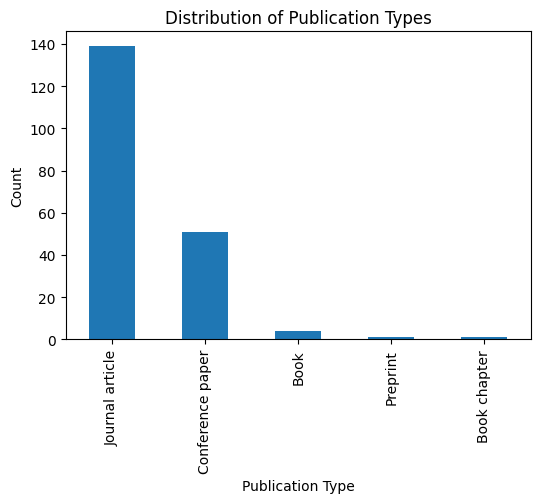

In [ ]:
import matplotlib.pyplot as plt
df['Type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Distribution of Publication Types")
plt.xlabel("Publication Type")
plt.ylabel("Count")
plt.show()

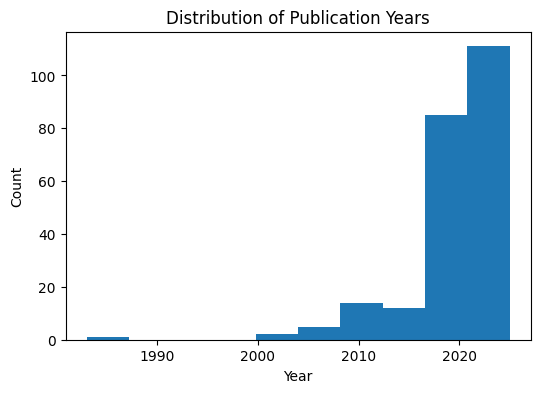

In [ ]:
df['Year'].plot(kind='hist', bins=10, figsize=(6,4))
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

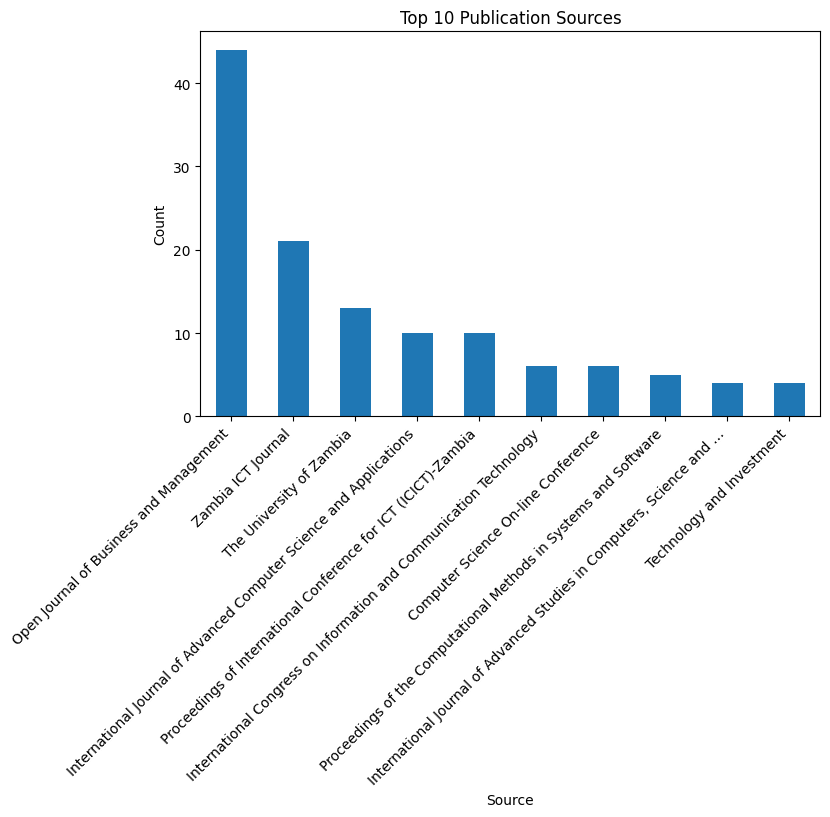

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 most frequent publication sources
top_sources = df['Source'].value_counts().head(10)

# Plot
top_sources.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Publication Sources")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


**Summary of Initial Findings**

- The dataset contains **247 publications** with **26 attributes**.  
- The most frequent publication type is **Journal Article**, followed by **Conference Paper** and **Book**.  
- Years range from **1985** to **2022**, showing a good historical spread.  
- There are missing values in several columns:
  - Year (17 missing)  
  - Type (51 missing)  
  - Source (25 missing)  
  - Publisher, DOI, ISSN, Abstract, FullTextURL, and RelatedURL are mostly empty.  
- Some categories in Type may need cleaning/standardization (e.g., “Book” vs “Book Chapter”).  
- The top publication sources include **IEEE**, **Elsevier**, and **Springer**, which appear most frequently in the dataset.  


# Data Preparartion



In [ ]:
df.isnull().sum()


,0
Cites,0
Authors,0
Title,0
Year,17
Source,25
Publisher,243
ArticleURL,247
CitesURL,0
GSRank,0
QueryDate,0


In [ ]:
df['Year'] = df['Year'].fillna(df['Year'].median())

In [ ]:
df['Year'].isnull().sum()


np.int64(0)

In [ ]:
df[['Title','Year']].head(30)


,Title,Year
0,Computer Science for Environmental Engineering...,2011.0
1,A Wireless Sensor Network Based Grain Inventor...,2016.0
2,Future wireless networks and information systems,2012.0
3,A Review of Identity Attribute Metrics Modelin...,2018.0
4,A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,2009.0
5,Zambian agricultural finance markets. Appraisa...,1983.0
6,Research Article A Descriptive Survey of Teach...,2022.0
7,Gates Open Research,2021.0
8,Gates Open Research,2020.0
9,Establishing the Significance of Credential At...,2007.0


In [ ]:
df['Type'] = df['Type'].fillna("Unknown")


In [ ]:
df[['Title','Type']].head(30)

,Title,Type
0,Computer Science for Environmental Engineering...,Book
1,A Wireless Sensor Network Based Grain Inventor...,Unknown
2,Future wireless networks and information systems,Book
3,A Review of Identity Attribute Metrics Modelin...,Unknown
4,A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,Book
5,Zambian agricultural finance markets. Appraisa...,Unknown
6,Research Article A Descriptive Survey of Teach...,Unknown
7,Gates Open Research,Unknown
8,Gates Open Research,Unknown
9,Establishing the Significance of Credential At...,Book


In [ ]:
df.isnull().sum()


,0
Cites,0
Authors,0
Title,0
Year,0
Source,25
Publisher,243
ArticleURL,247
CitesURL,0
GSRank,0
QueryDate,0


In [ ]:
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False)


,0
ArticleURL,100.000000
DOI,100.000000
FullTextURL,100.000000
RelatedURL,100.000000
ISSN,100.000000
Abstract,100.000000
Publisher,98.380567
Issue,48.582996
Volume,44.939271
StartPage,43.724696


In [ ]:
mostly_empty = missing_percent[missing_percent > 80]
print(mostly_empty)


Publisher       98.380567
ArticleURL     100.000000
DOI            100.000000
ISSN           100.000000
Abstract       100.000000
FullTextURL    100.000000
RelatedURL     100.000000
dtype: float64


In [ ]:
mostly_empty_cols = missing_percent[missing_percent > 80].index
print("Columns to drop:", mostly_empty_cols.tolist())


Columns to drop: ['Publisher', 'ArticleURL', 'DOI', 'ISSN', 'Abstract', 'FullTextURL', 'RelatedURL']


In [ ]:
df = df.drop(columns=mostly_empty_cols)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cites           247 non-null    int64  
 1   Authors         247 non-null    object 
 2   Title           247 non-null    object 
 3   Year            247 non-null    float64
 4   Source          222 non-null    object 
 5   CitesURL        247 non-null    object 
 6   GSRank          247 non-null    int64  
 7   QueryDate       247 non-null    object 
 8   Type            247 non-null    object 
 9   CitationURL     247 non-null    object 
 10  Volume          136 non-null    float64
 11  Issue           127 non-null    float64
 12  StartPage       139 non-null    float64
 13  EndPage         139 non-null    float64
 14  ECC             247 non-null    int64  
 15  CitesPerYear    247 non-null    float64
 16  CitesPerAuthor  247 non-null    int64  
 17  AuthorCount     247 non-null    int

In [ ]:
df['Pub_Age'] = 2025 - df['Year']


In [ ]:
df[['Year','Pub_Age']].head(10)


,Year,Pub_Age
0,2011.0,14.0
1,2016.0,9.0
2,2012.0,13.0
3,2018.0,7.0
4,2009.0,16.0
5,1983.0,42.0
6,2022.0,3.0
7,2021.0,4.0
8,2020.0,5.0
9,2007.0,18.0


This code displays the first 10 rows of the `"Year"` and `"Pub_Age"` columns from the DataFrame `df`.


In [ ]:
print("Pub_Age" in df.columns)


True


This code prints `True` if the `"Pub_Age"` column exists in the DataFrame `df`, and `False` otherwise.

In [ ]:
df['Pub_Age'].describe()


,Pub_Age
count,247.000000
mean,5.502024
std,4.717960
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,42.000000


This code provides a statistical summary of the values in the `"Pub_Age"` column, helping you understand its distribution.

In [ ]:
row = df.iloc[10]
print("Year:", row['Year'])
print("Pub_Age:", row['Pub_Age'])


Year: 2020.0
Pub_Age: 5.0


Retrieves the 11th row (index 10) from the DataFrame df using iloc.

Prints the value in the "Year" column of that row.

Prints the value in the "Pub_Age" column of that row.

In [ ]:
from sklearn.preprocessing import LabelEncoder

This line imports the LabelEncoder class from the sklearn.preprocessing module in scikit-learn.

LabelEncoder is used to convert categorical labels (strings or non-numeric values) into numeric format.

It is commonly used in machine learning workflows where algorithms require input features to be numeric.

In [ ]:
le = LabelEncoder()
df['Type_Label'] = le.fit_transform(df['Type'])

This code initializes a `LabelEncoder` and applies it to the `'Type'` column of the DataFrame `df`, converting categorical string values into numeric labels. The encoded values are then stored in a new column called `'Type_Label'`.


In [ ]:
df[['Type','Type_Label']].head()

,Type,Type_Label
0,Book,0
1,Unknown,5
2,Book,0
3,Unknown,5
4,Book,0


This code displays the first 5 rows of the DataFrame, showing both the original categorical `'Type'` column and its corresponding encoded numeric `'Type_Label'` column side-by-side.


**Rationale:**  
- Pub_Age captures the recency of the publication, which may influence citation count and type.  
- Highly_Cited allows us to identify influential publications that might correlate with type or source.  


**RATIAONALE**
- We converted Types into numerical Labels to make it reusbale for machine learning algorithms.
- For Example book = 0 and unknown = 5

In [ ]:
df.to_csv("unza_publications_cleaned.csv", index=False)
print("cleaned dataset saved")

cleaned dataset saved


In [ ]:
import os
os.listdir()

['.config',
 'unza_publications (1).csv',
 'unza_publications_cleaned.csv',
 'unza_publications.csv',
 'sample_data']

In [ ]:
test_df = pd.read_csv("unza_publications_cleaned.csv")
test_df.head()

,Cites,Authors,Title,Year,Source,CitesURL,GSRank,QueryDate,Type,CitationURL,...,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Pub_Age,Type_Label
0,27,"Y Yu, Z Yu, J Zhao",Computer Science for Environmental Engineering...,2011.0,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,15,2025-08-19 15:00:57,Book,https://scholar.google.com/citations?view_op=v...,...,NaN,NaN,NaN,27,1.93,9,3,14.0,14.0,0
1,22,C Muyunda,A Wireless Sensor Network Based Grain Inventor...,2016.0,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,22,2025-08-19 15:00:57,Unknown,https://scholar.google.com/citations?view_op=v...,...,NaN,NaN,NaN,22,2.44,22,1,9.0,9.0,5
2,15,Y Zhang,Future wireless networks and information systems,2012.0,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,36,2025-08-19 15:00:57,Book,https://scholar.google.com/citations?view_op=v...,...,NaN,NaN,NaN,15,1.15,15,1,13.0,13.0,0
3,1,"F Kabwe, Z Lusaka, J Phiri",A Review of Identity Attribute Metrics Modelin...,2018.0,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,167,2025-08-19 15:00:57,Unknown,https://scholar.google.com/citations?view_op=v...,...,NaN,NaN,NaN,1,0.14,0,3,7.0,7.0,5
4,1,"J Katambo, M Nyirenda, J Phiri, Z Lusaka",A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,2009.0,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,174,2025-08-19 15:00:57,Book,https://scholar.google.com/citations?view_op=v...,...,NaN,NaN,NaN,1,0.06,0,4,16.0,16.0,0


In [ ]:
print(test_df.shape)

(247, 21)


In [ ]:
import os
print(os.path.exists("unza_publications_cleaned.csv"))

True


In [ ]:
os.path.getsize("unza_publications_cleaned.csv")

115496

In [ ]:
from google.colab import files
files.download("unza_publications_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling

In this section, we train our first data mining model.  
The **goal** is to predict the type of publication (e.g., Book, Unknown, etc.)  
based on features such as citation count, year, and number of authors.  

We chose the **Decision Tree Classifier** as our baseline algorithm because:  
- It is simple and easy to interpret.  
- It works well with both categorical and numerical data.  
- It provides a strong baseline for classification tasks before trying more complex models.  

The dataset was split into **80% training** and **20% testing** for fair evaluation.

import required libraries


In [68]:
#1. import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [69]:
# 2. Define Features (X) and Target (y)
X = df[['Cites', 'Year', 'GSRank', 'ECC', 'CitesPerYear',
        'CitesPerAuthor', 'AuthorCount', 'Age', 'Pub_Age']]
y = df['Type_Label']

In [70]:
# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [71]:
# 4. Initialize and train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# 5. Make predictions
y_pred = model.predict(X_test)

In [73]:
# 6. Evaluate model performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.6

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.29      0.50      0.37        10
           3       0.63      0.52      0.57        23
           5       0.92      0.80      0.86        15

    accuracy                           0.60        50
   macro avg       0.57      0.56      0.56        50
weighted avg       0.65      0.60      0.61        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
